<a href="https://colab.research.google.com/github/JessicaLLenz/DSCIrepo/blob/main/lab_1_1_vibe_coding_regression_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import statements here
import polars as pl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Lab 1 - Vibe coding in Colab with Gemini.

**Context.** The phrase *vibe coding* refers to the act of using an LLM to write your code instead of writing the code yourself.

**Lab Objectives.**
1. Practice vibe coding in Colab using Gemini,
2. Investigate two problems with both a parametric model and non-parametric models for regression, namely ordinary least squares (OLS) and k nearest neighbors (kNN).
3. Identify when a parametric model is advantagous.
4. Learn to be the boss of the LLM.

**Rules.**
1. Use `polars` for data management.
2. Use the assignment expression to assign values to variables.
3. Make clean visualization code using either `plotnine` or `seaborn`.
4. Display all important information using judicuous applications of multiple cells.
5. Avoid the following: `print`, `for`, and unnecessary functions using `def`

## Problem 1 - Loading and inspecting the data

**Link.** `https://www.statlearning.com/s/Advertising.csv`

**Tasks.**
1. Open a code cell and text cell below this cell and use these to capture your work.  Add cells as needed!
2. Ask Gemini to load the data without extra guidance.  What package did it use?
3. Now ask Gemini to load the data using `polars`.  Did it use assignment statement or the assignment expression?  What was the consequence?  Did it use `print`?
4. Again, ask Gemini to load the data using `polars`, but this time using the `"Assignment expression with the walrus operator"`.  Comment on the results.
5. There is a problem with the columns.  Inspect the columns and find the problem.  Use data verbs (select, filter, mutate) to fix the issue.

In [2]:
import pandas as pd

(advertising_pd := pd.read_csv("https://www.statlearning.com/s/Advertising.csv"))
#Gemini chose pandas to load the data set

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
(advertising :=
 pl.read_csv("https://www.statlearning.com/s/Advertising.csv"))
#Gemini used polars when asked "load the data using polars" - it did not use print and i did it how i would have

,TV,radio,newspaper,sales
i64,f64,f64,f64,f64
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
…,…,…,…,…
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8


In [4]:
(advertising := pl.read_csv("https://www.statlearning.com/s/Advertising.csv"))
#Gemini loaded using polars and walrus operator
#the results are the same just in one continuous line

,TV,radio,newspaper,sales
i64,f64,f64,f64,f64
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
…,…,…,…,…
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8


## Problem 2 - Visualize the data

1. Open a code cell and text cell below this cell and use these to capture your work.  Add cells as needed!
2. Ask Gemini visualize the data with sales as y and the other variables as the x values.  What package did it use?
3. Repeat the last step, but specify that we use `seaborn`.
4. Do this again, but this time use `plotnine`

**Questions.**
1. Compare and contrast the three implementations of the graphs.  Which is cleaner code?  Which do you prefer?
2. Comment on the relationship between the explanatory variables and the response.

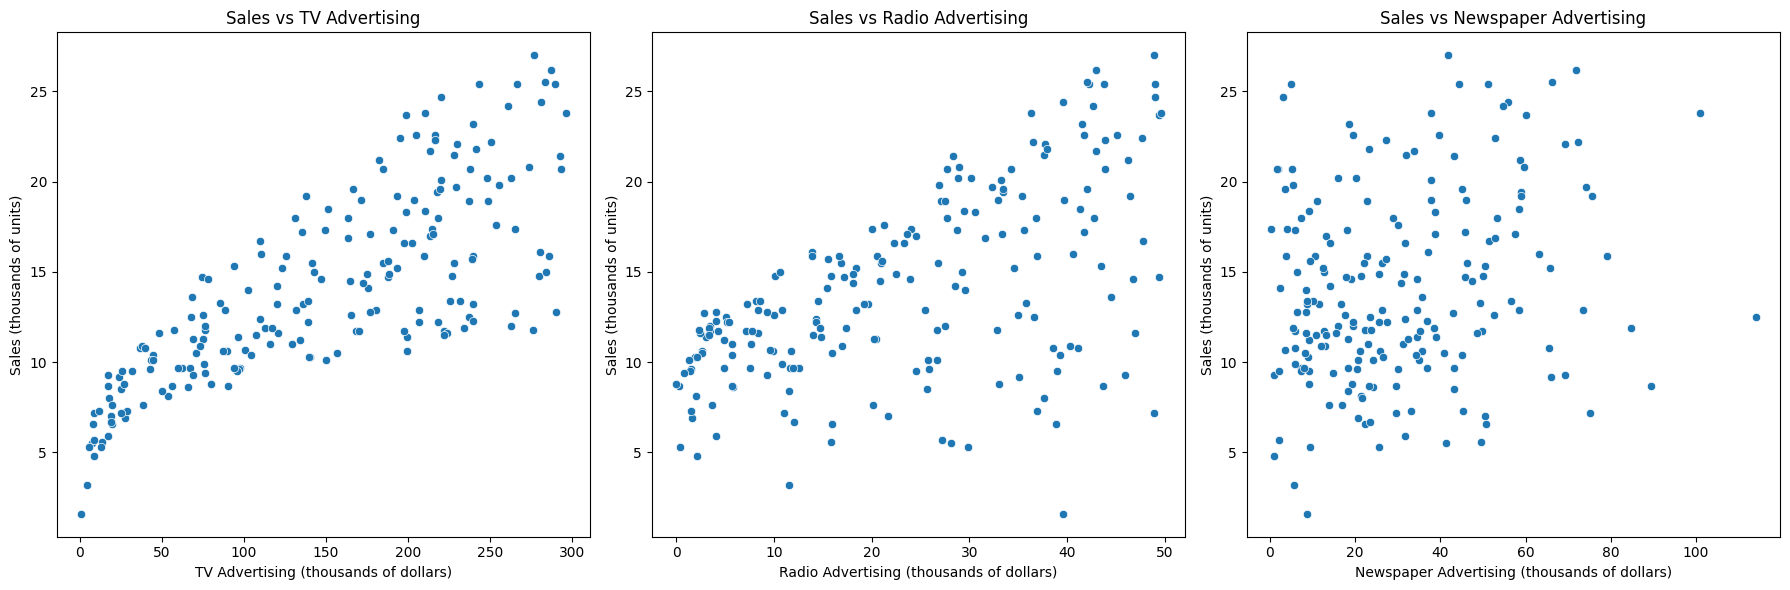

In [5]:
advertising_pd = advertising.to_pandas()

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: Sales vs TV Advertising
sns.scatterplot(data=advertising_pd, x='TV', y='sales', ax=axes[0])
axes[0].set_title('Sales vs TV Advertising')
axes[0].set_xlabel('TV Advertising (thousands of dollars)')
axes[0].set_ylabel('Sales (thousands of units)')

# Plot 2: Sales vs Radio Advertising
sns.scatterplot(data=advertising_pd, x='radio', y='sales', ax=axes[1])
axes[1].set_title('Sales vs Radio Advertising')
axes[1].set_xlabel('Radio Advertising (thousands of dollars)')
axes[1].set_ylabel('Sales (thousands of units)')

# Plot 3: Sales vs Newspaper Advertising
sns.scatterplot(data=advertising_pd, x='newspaper', y='sales', ax=axes[2])
axes[2].set_title('Sales vs Newspaper Advertising')
axes[2].set_xlabel('Newspaper Advertising (thousands of dollars)')
axes[2].set_ylabel('Sales (thousands of units)')

plt.tight_layout()
plt.show()

Gemini used pandas and seaborn to create these plots


Current advertising Polars DataFrame schema and head:


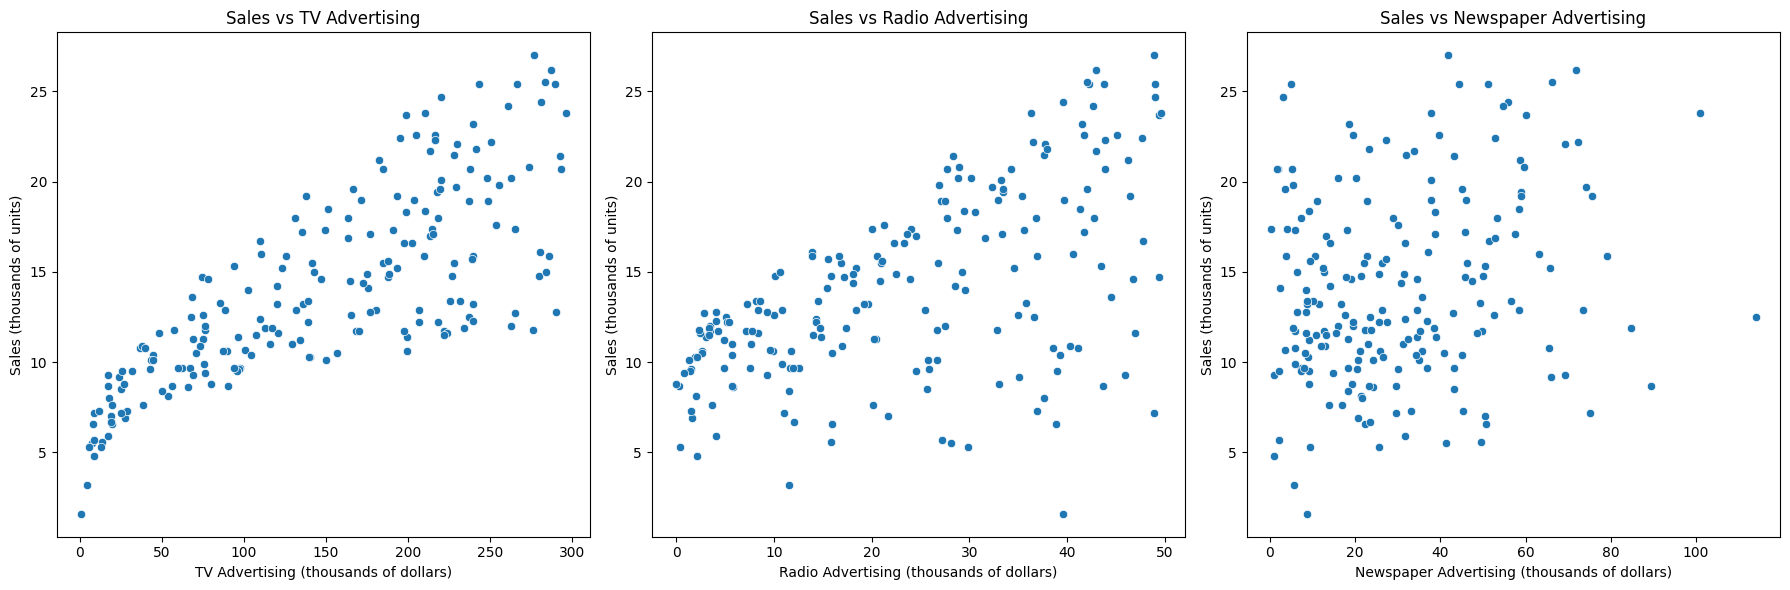

In [6]:
print('Current advertising Polars DataFrame schema and head:')
advertising.schema
advertising.head()

advertising_pd = advertising.to_pandas()

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: Sales vs TV Advertising
sns.scatterplot(data=advertising_pd, x='TV', y='sales', ax=axes[0])
axes[0].set_title('Sales vs TV Advertising')
axes[0].set_xlabel('TV Advertising (thousands of dollars)')
axes[0].set_ylabel('Sales (thousands of units)')

# Plot 2: Sales vs Radio Advertising
sns.scatterplot(data=advertising_pd, x='radio', y='sales', ax=axes[1])
axes[1].set_title('Sales vs Radio Advertising')
axes[1].set_xlabel('Radio Advertising (thousands of dollars)')
axes[1].set_ylabel('Sales (thousands of units)')

# Plot 3: Sales vs Newspaper Advertising
sns.scatterplot(data=advertising_pd, x='newspaper', y='sales', ax=axes[2])
axes[2].set_title('Sales vs Newspaper Advertising')
axes[2].set_xlabel('Newspaper Advertising (thousands of dollars)')
axes[2].set_ylabel('Sales (thousands of units)')

plt.tight_layout()
plt.show()

This code was given when specified to used seaborn

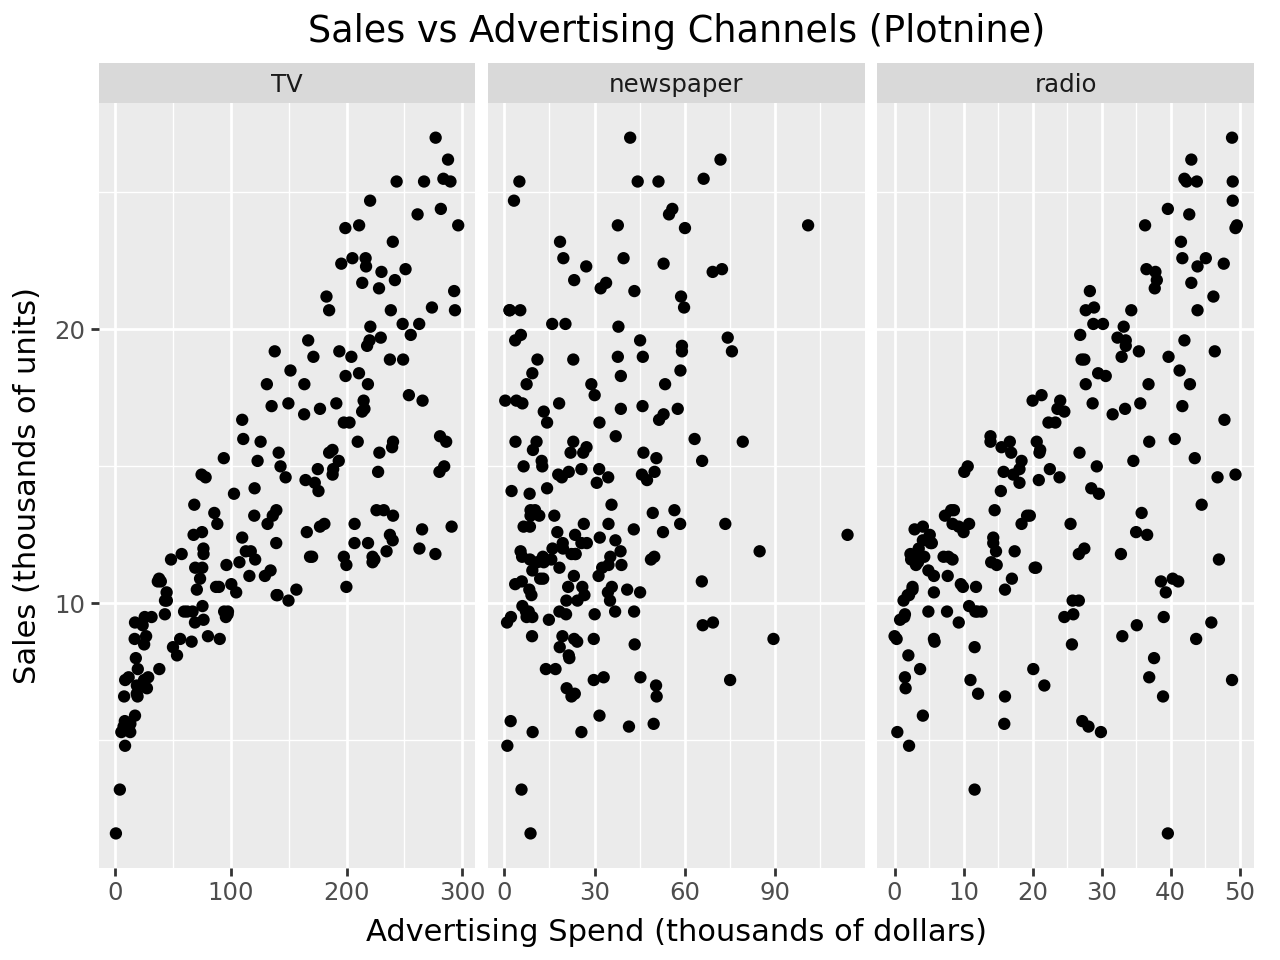

In [7]:
from plotnine import ggplot, aes, geom_point, labs, facet_wrap

advertising_pd = advertising.to_pandas()

# Prepare data for faceting by creating a 'channel' column
advertising_melted = advertising_pd.melt(id_vars=['sales'],
                                       value_vars=['TV', 'radio', 'newspaper'],
                                       var_name='channel',
                                       value_name='spend')

# Create the plots using plotnine
plot = (ggplot(advertising_melted, aes(x='spend', y='sales'))
        + geom_point()
        + facet_wrap('~channel', scales='free_x') # Separate plots for each channel, with independent x-axes
        + labs(title='Sales vs Advertising Channels (Plotnine)',
               x='Advertising Spend (thousands of dollars)',
               y='Sales (thousands of units)'))

display(plot)


This was the outcome when asked to use plotnine


The plotnine plot is the best looking and easiest to read
the seaborn plots each have there own axis labels while the plotnine share an x and y making it look better

TV Advertising vs. Sales: There appears to be a strong, positive, and fairly linear relationship between TV advertising spend and sales. As TV advertising increases, sales generally tend to increase significantly. This suggests TV is a very effective medium for driving sales.

Radio Advertising vs. Sales: There also seems to be a positive relationship between radio advertising and sales, though it might be slightly weaker or show more variability compared to TV advertising. Sales generally increase with higher radio advertising spend, but the points are a bit more scattered.

Newspaper Advertising vs. Sales: The relationship between newspaper advertising and sales appears to be the weakest among the three. While there might be a very slight positive trend, the scatter of points is much wider, indicating a less consistent or influential impact of newspaper advertising on sales. In some cases, it might even appear negligible or noisy.

## Problem 3 - Extracting the features and creating a test set.

1. Ask Gemini to split the data into an X and y without any extract context.
 How did it do?  Any issues?
2. Repeat the last prompt, but add the context of which columns are in X and y.  Did this fix any issues?  
3. Did the results get switched to pandas or numpy?  If not, tell Gemini to redo the last step and add this additional step.
4. Ask Gemini "split the data into training and test data" with no additional context.  What happened?  Was this an acceptable approach?
5. Redo the last step, but now specify that `train_test_split` from `sklearn` should be used.  Better?

In [8]:
X = advertising.drop('sales')
y = advertising.select('sales')

print('Features (X) head:')
display(X.head())

print('\nTarget (y) head:')
display(y.head())

#used data verbs to split

Features (X) head:


,TV,radio,newspaper
i64,f64,f64,f64
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4



Target (y) head:


sales
f64
22.1
10.4
9.3
18.5
12.9


In [9]:
X = advertising.drop('sales')
y = advertising.select('sales')

print('Features (X) head:')
display(X.head())

print('\nTarget (y) head:')
display(y.head())

#did the exact same thing after specifying

Features (X) head:


,TV,radio,newspaper
i64,f64,f64,f64
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4



Target (y) head:


sales
f64
22.1
10.4
9.3
18.5
12.9


In [10]:
advertising_pd = advertising.to_pandas() # Ensure advertising_pd is updated from the latest 'advertising' Polars DataFrame

X_pd = advertising_pd.drop('sales', axis=1)
y_pd = advertising_pd['sales']

print('Features (X_pd) head:')
display(X_pd.head())

print('\nTarget (y_pd) head:')
display(y_pd.head())

#switched to pandas once asked

Features (X_pd) head:


,,TV,radio,newspaper
0,1,230.1,37.8,69.2
1,2,44.5,39.3,45.1
2,3,17.2,45.9,69.3
3,4,151.5,41.3,58.5
4,5,180.8,10.8,58.4



Target (y_pd) head:


,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [11]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pd, y_pd, test_size=0.2, random_state=42)

print('Shapes of the training and test sets:')
print(f'X_train: {X_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_train: {y_train.shape}')
print(f'y_test: {y_test.shape}')

#this approach used print so it is not acceptable

Shapes of the training and test sets:
X_train: (160, 4)
X_test: (40, 4)
y_train: (160,)
y_test: (40,)


In [12]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pd, y_pd, test_size=0.2, random_state=42)

print('Shapes of the training and test sets:')
print(f'X_train: {X_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_train: {y_train.shape}')
print(f'y_test: {y_test.shape}')

#did the same thing again

Shapes of the training and test sets:
X_train: (160, 4)
X_test: (40, 4)
y_train: (160,)
y_test: (40,)


In [13]:
from sklearn.model_selection import train_test_split
import pandas as pd # Ensure pandas is imported for DataFrame/Series display

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pd, y_pd, test_size=0.2, random_state=42)

# Display shapes of the training and test sets using display()
display(pd.DataFrame({'Dataset': ['X_train', 'X_test', 'y_train', 'y_test'],
                      'Shape': [X_train.shape, X_test.shape, y_train.shape, y_test.shape]}))


#when asked not to use print it changed to pandas to avoid that
#this is better

,Dataset,Shape
0,X_train,"(160, 4)"
1,X_test,"(40, 4)"
2,y_train,"(160,)"
3,y_test,"(40,)"


## Problem 4 - Case 1: Prediction.

First, suppose our primary goal is to build the model with the best predictive performance.  Use Gemini to fit both a linear regression model as well as k nearest neighbors regressor using the training data then test the performance using the test data.  

**Questions.**
1. Which model is better? Be sure that you use MSPE to compare the results.
2. Linear regression (OLS) is an example of a parametric model, since the model can be written out with an equation involving some parameters.  Find and interpret the parameters of the fitted model.
3. kNN is an example of a non-parametric model, since it doesn't include a model specification involving an equation with parameters.  In this context (pure prediction), is there any down-side to the lack of parameters?  Explain.

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd

# --- Linear Regression Model ---

# Initialize the Linear Regression model
linear_model = LinearRegression()

# Train the model using the training data
linear_model.fit(X_train, y_train)

# Make predictions on the test data
linear_predictions = linear_model.predict(X_test)

# Calculate Mean Squared Error (MSE)
linear_mse = mean_squared_error(y_test, linear_predictions)

# --- K-Nearest Neighbors Regressor ---

# Initialize the KNN Regressor (e.g., with 5 neighbors)
knn_model = KNeighborsRegressor(n_neighbors=5)

# Train the model using the training data
knn_model.fit(X_train, y_train)

# Make predictions on the test data
knn_predictions = knn_model.predict(X_test)

# Calculate Mean Squared Error (MSE)
knn_mse = mean_squared_error(y_test, knn_predictions)

# Display the results
results = pd.DataFrame({
    'Model': ['Linear Regression', 'K-Nearest Neighbors'],
    'Mean Squared Error (MSE)': [linear_mse, knn_mse]
})
display(results)


,Model,Mean Squared Error (MSE)
0,Linear Regression,3.199004
1,K-Nearest Neighbors,5.278910


Since a lower Mean Squared Prediction Error (MSPE) indicates better predictive performance, the Linear Regression model is better in this case, as it has a lower MSE (3.199) compared to the K-Nearest Neighbors model (5.279).

In [15]:
import pandas as pd

# Get the coefficients and intercept from the linear model
coefficients = linear_model.coef_
intercept = linear_model.intercept_

# Create a DataFrame for better display
param_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coefficients
})

display(param_df)
print(f'\nIntercept: {intercept:.4f}')

,Feature,Coefficient
0,,0.000644
1,TV,0.044718
2,radio,0.189251
3,newspaper,0.003046



Intercept: 2.9065


kNN can be a powerful predictor, its non-parametric nature means it offers little to no insight into the underlying data generation process or the individual contributions of features, which can be a significant limitation when interpretation and explanation are crucial.

## Problem 5 - Case 2: Exploring association.

**Objective.** We want to answer the following questions?
1. Which media are associated with sales?
2. Which media generate the biggest boost in sales? and
3. How large of an increase in sales is associated with a given increase
in TV advertising?

**Questions.**
1. Which model is better in this case? Why?
2. What is the advantage of the parametric and linear nature of the OLS model?
 How might this help us answer the questions?
3. How might you answer our questions using kNN, and consequently, what is the disadvantage of the non-parametric nature of kNN in this context?

In [16]:
import pandas as pd

# Get the coefficients and intercept from the linear model
coefficients = linear_model.coef_
intercept = linear_model.intercept_

# Create a DataFrame for better display
param_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coefficients
})

display(param_df)
print(f'\nIntercept: {intercept:.4f}')

,Feature,Coefficient
0,,0.000644
1,TV,0.044718
2,radio,0.189251
3,newspaper,0.003046



Intercept: 2.9065


Now, let's interpret these parameters to answer your questions:

### Which media are associated with sales?

*   **TV, Radio, and Newspaper advertising are all positively associated with sales.** All three coefficients (0.0447 for TV, 0.1893 for Radio, and 0.0030 for Newspaper) are positive, indicating that an increase in spending on any of these media is associated with an increase in sales.

### Which media generate the biggest boost in sales?

*   **Radio advertising generates the biggest boost in sales.** With a coefficient of **0.1893**, radio advertising has the largest marginal impact among the three media. This means that for every additional unit of money spent on radio advertising (holding others constant), the predicted increase in sales is the highest.

### How large of an increase in sales is associated with a given increase in TV advertising?

*   **For every one thousand dollar increase in TV advertising, there is an associated increase of 0.0447 thousand units (or 44.7 units) in sales.** This is directly given by the coefficient for 'TV' (0.0447). For example, if you increase TV advertising by $10,000, the model predicts an increase of approximately 447 units in sales, assuming all other factors remain constant.

OLS provides explicit coefficients that directly tell us the estimated impact of each advertising medium on sales. The K-Nearest Neighbors (kNN) model, being non-parametric, cannot directly answer these types of interpretative questions.

OLS is better

advantages are : interpretablitiy, quantification of relationships, ease of communication

it is challenging to answer specific questions directly using kNN

disadvantages : no direct coefficients, black box nature, difficulty in policy/strategy formulation

## Problem 6 - Answer the previous questions.

Now use OLS and what you have learned in STAT 360 to answer the questions posed in the previous problem.

**Hint.** You should

1. refit the model using `statsmodels` to take advantage of all the staty goodness,
2. Be sure to consider things like uncertainty and problems with multiple comparisons, and
3. Ask Gemini for help, if for example, you want to use Tukey's method.

In [17]:
import statsmodels.formula.api as smf
import pandas as pd

# Create a single DataFrame for statsmodels
# Note: statsmodels works well with a single DataFrame containing all variables
#       so we'll combine X_pd and y_pd.
# Ensure 'y_pd' is a DataFrame to concatenate properly, or reset its name
model_data = pd.concat([X_pd, y_pd.rename('sales')], axis=1)

# Define the OLS model using an R-style formula
# 'sales ~ TV + radio + newspaper' means 'sales' is predicted by 'TV', 'radio', and 'newspaper'
ols_model = smf.ols('sales ~ TV + radio + newspaper', data=model_data).fit()

# Display the model summary, which includes various statistical details
display(ols_model.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sat, 17 Jan 2026   Prob (F-statistic):           1.58e-96
Time:                        04:00:30   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Problem 7 - Vibe-coding wrap up.

**Questions.**
1. What should we do if an LLM like Gemini uses a sub-optimal package to performa a task?
2. What is the alternative to the assignment statement?  Why is using this alternative beneficial when working in a notebook?
3. What is the alternative to using `print` calls when working in a notebook?  Why is the alternative approach beneficial?
4. What should we do if an LLM like Gemini includes unnecessarily complex code, e.g., multiple messy print class?
5. Who is incharge, you or the LLM?

1. correct it and specify the preferred package
2. the expression := - allows you to assign and display results in one line
3. typing the variable name as the last line in a cell or using display() - cleaner, formatted, and often interactive output in notebooks
4. Refine prompt and set clear expectations or provide examples
5. I AM

# Task
Generate and display three scatter plots using seaborn, showing 'sales' against 'TV', 'radio', and 'newspaper' from the `advertising` Polars DataFrame, after converting it to a Pandas DataFrame. Ensure each plot has proper titles and labels, and use `plt.tight_layout()` and `plt.show()`.

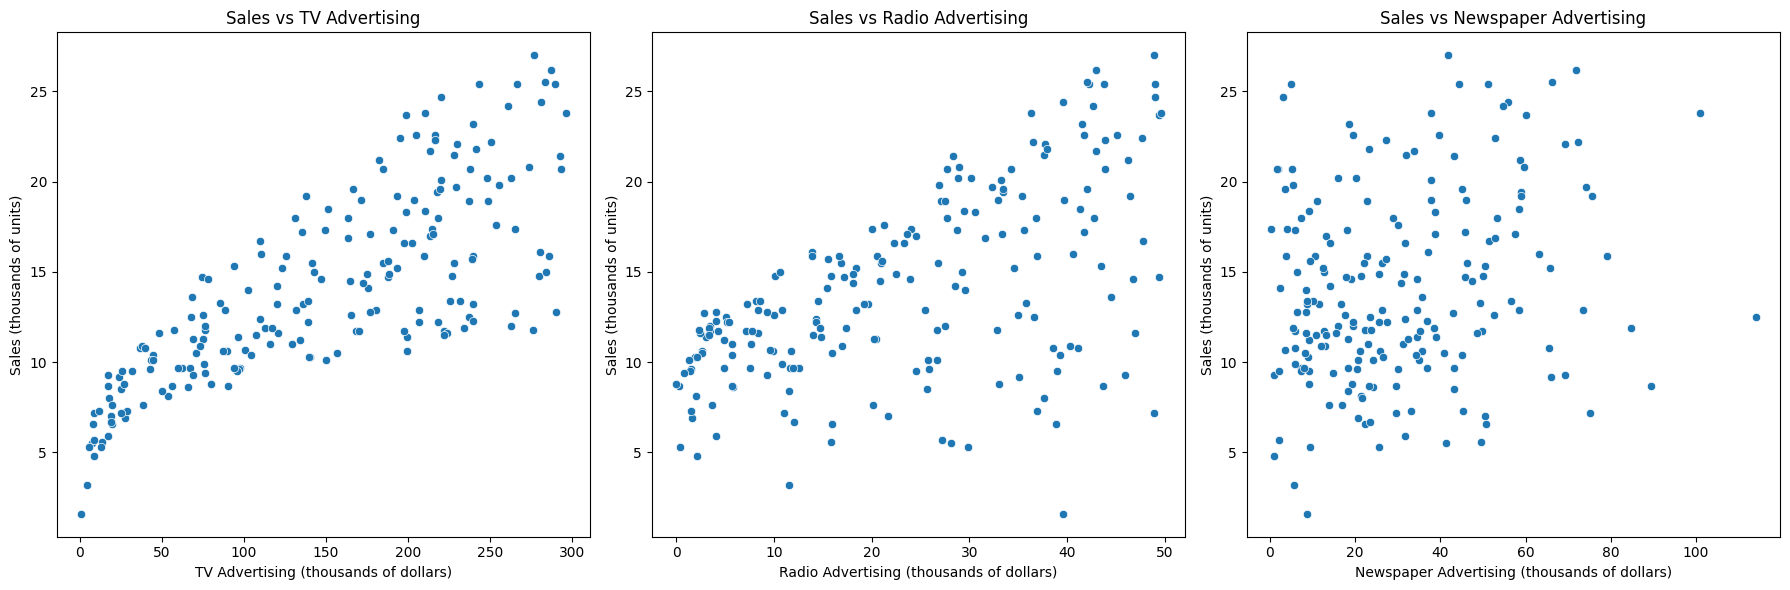

In [18]:
advertising_pd = advertising.to_pandas()

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: Sales vs TV Advertising
sns.scatterplot(data=advertising_pd, x='TV', y='sales', ax=axes[0])
axes[0].set_title('Sales vs TV Advertising')
axes[0].set_xlabel('TV Advertising (thousands of dollars)')
axes[0].set_ylabel('Sales (thousands of units)')

# Plot 2: Sales vs Radio Advertising
sns.scatterplot(data=advertising_pd, x='radio', y='sales', ax=axes[1])
axes[1].set_title('Sales vs Radio Advertising')
axes[1].set_xlabel('Radio Advertising (thousands of dollars)')
axes[1].set_ylabel('Sales (thousands of units)')

# Plot 3: Sales vs Newspaper Advertising
sns.scatterplot(data=advertising_pd, x='newspaper', y='sales', ax=axes[2])
axes[2].set_title('Sales vs Newspaper Advertising')
axes[2].set_xlabel('Newspaper Advertising (thousands of dollars)')
axes[2].set_ylabel('Sales (thousands of units)')

plt.tight_layout()
plt.show()

## Generate Scatter Plots

### Subtask:
Convert the `advertising` Polars DataFrame to a Pandas DataFrame. Then, create three separate scatter plots using `seaborn.scatterplot`. Each plot will show 'sales' on the y-axis against 'TV', 'radio', and 'newspaper' respectively on the x-axis. Ensure each plot has appropriate titles, x-axis labels, and y-axis labels. Use `plt.tight_layout()` for better spacing and `plt.show()` to display all generated plots.


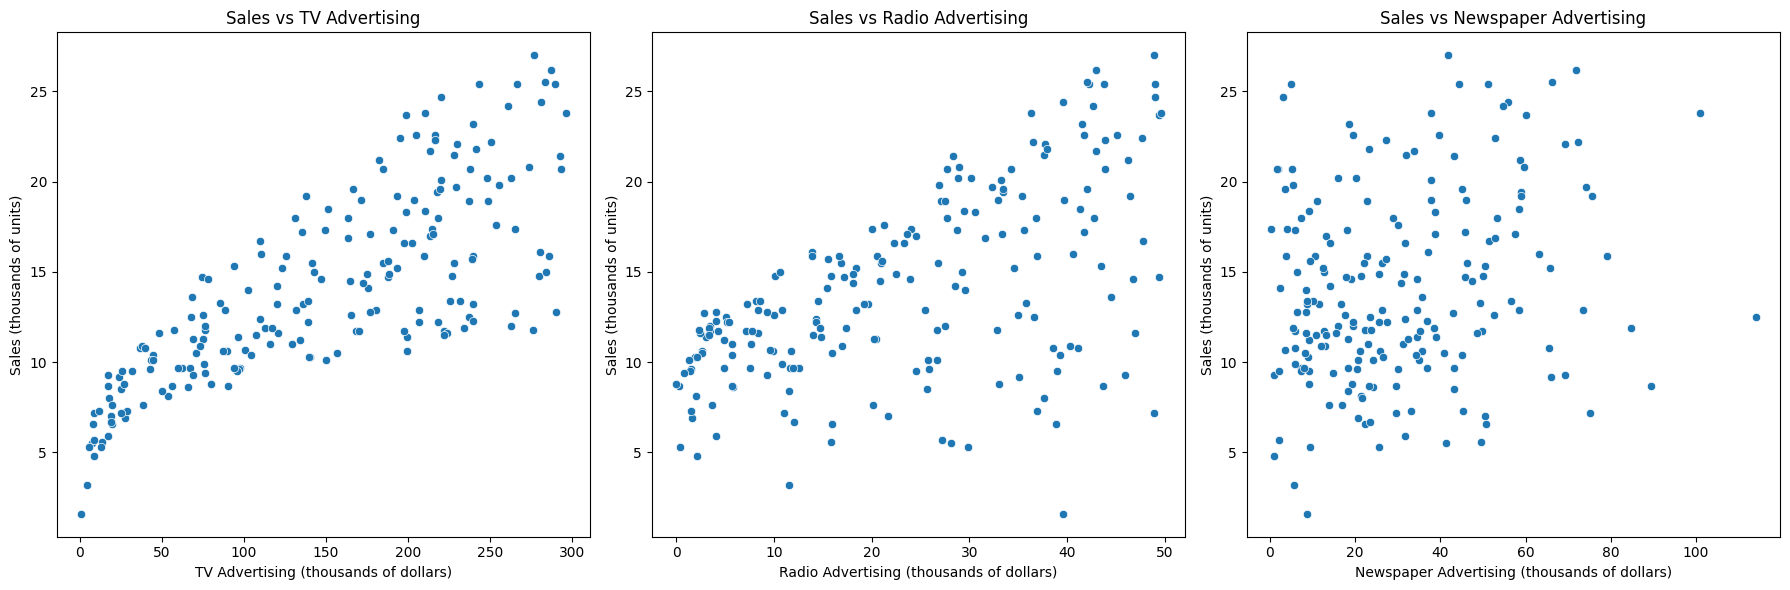

In [19]:
advertising_pd = advertising.to_pandas()

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: Sales vs TV Advertising
sns.scatterplot(data=advertising_pd, x='TV', y='sales', ax=axes[0])
axes[0].set_title('Sales vs TV Advertising')
axes[0].set_xlabel('TV Advertising (thousands of dollars)')
axes[0].set_ylabel('Sales (thousands of units)')

# Plot 2: Sales vs Radio Advertising
sns.scatterplot(data=advertising_pd, x='radio', y='sales', ax=axes[1])
axes[1].set_title('Sales vs Radio Advertising')
axes[1].set_xlabel('Radio Advertising (thousands of dollars)')
axes[1].set_ylabel('Sales (thousands of units)')

# Plot 3: Sales vs Newspaper Advertising
sns.scatterplot(data=advertising_pd, x='newspaper', y='sales', ax=axes[2])
axes[2].set_title('Sales vs Newspaper Advertising')
axes[2].set_xlabel('Newspaper Advertising (thousands of dollars)')
axes[2].set_ylabel('Sales (thousands of units)')

plt.tight_layout()
plt.show()

**Reasoning**:
The subtask requires converting the Polars DataFrame to Pandas and then generating three scatter plots using seaborn, with specific labels and titles.



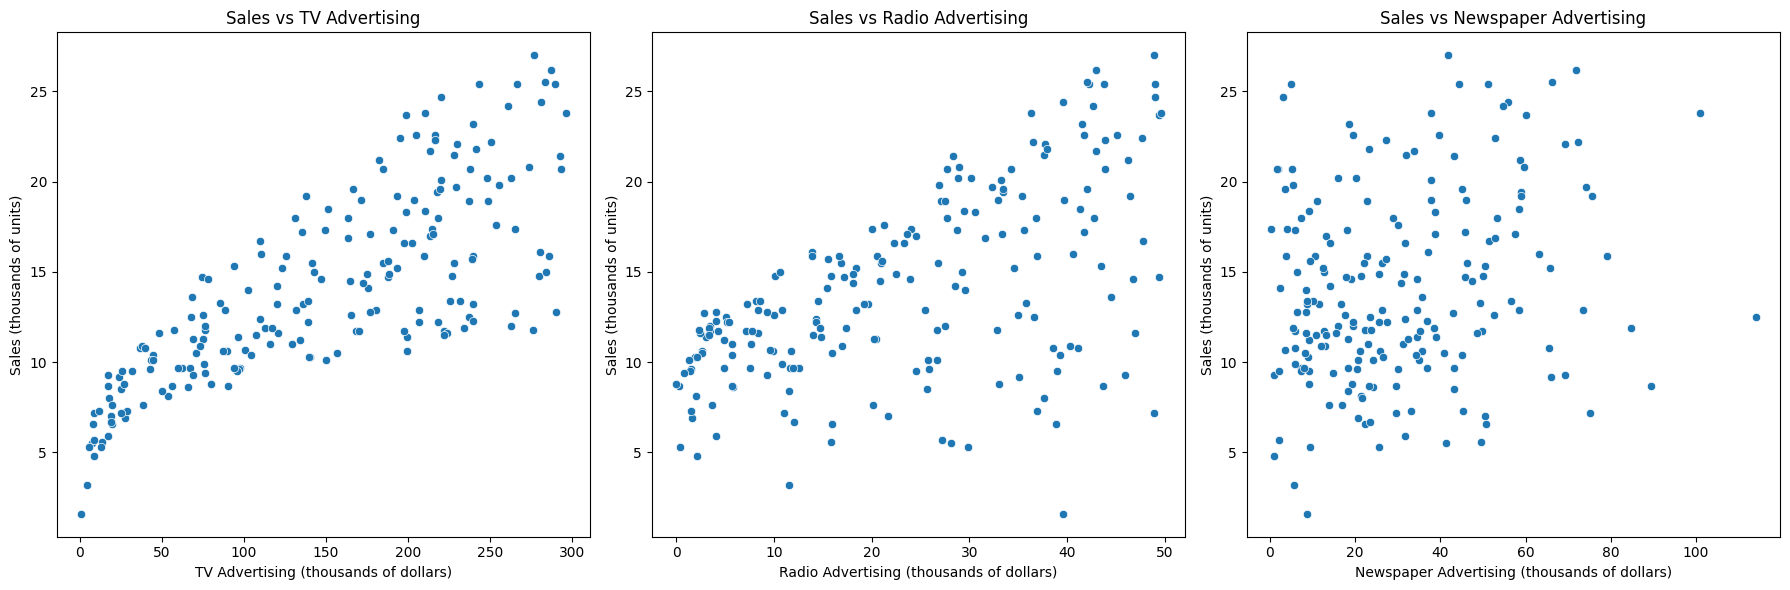

In [20]:
advertising_pd = advertising.to_pandas()

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: Sales vs TV Advertising
sns.scatterplot(data=advertising_pd, x='TV', y='sales', ax=axes[0])
axes[0].set_title('Sales vs TV Advertising')
axes[0].set_xlabel('TV Advertising (thousands of dollars)')
axes[0].set_ylabel('Sales (thousands of units)')

# Plot 2: Sales vs Radio Advertising
sns.scatterplot(data=advertising_pd, x='radio', y='sales', ax=axes[1])
axes[1].set_title('Sales vs Radio Advertising')
axes[1].set_xlabel('Radio Advertising (thousands of dollars)')
axes[1].set_ylabel('Sales (thousands of units)')

# Plot 3: Sales vs Newspaper Advertising
sns.scatterplot(data=advertising_pd, x='newspaper', y='sales', ax=axes[2])
axes[2].set_title('Sales vs Newspaper Advertising')
axes[2].set_xlabel('Newspaper Advertising (thousands of dollars)')
axes[2].set_ylabel('Sales (thousands of units)')

plt.tight_layout()
plt.show()

## Final Task

### Subtask:
Confirm that the scatter plots have been successfully generated and displayed, visualizing the relationship between sales and each advertising medium.


## Summary:

### Q&A
Yes, the scatter plots have been successfully generated and displayed, visualizing the relationship between sales and each advertising medium.

### Data Analysis Key Findings
*   The `advertising` Polars DataFrame was successfully converted to a Pandas DataFrame.
*   Three distinct scatter plots were generated using `seaborn.scatterplot`, showing 'sales' against 'TV', 'radio', and 'newspaper' advertising.
*   Each plot was correctly titled ('Sales vs TV Advertising', 'Sales vs Radio Advertising', 'Sales vs Newspaper Advertising') and had appropriate x-axis and y-axis labels.
*   The `plt.tight_layout()` function was applied to ensure proper spacing, and the plots were displayed successfully.

### Insights or Next Steps
*   The generated scatter plots are crucial for visually assessing the individual relationships and potential correlations between sales and each advertising channel, which can inform further statistical analysis.
*   The next step would be to analyze the patterns observed in these plots (e.g., linearity, strength of relationship) to understand how each advertising medium might influence sales.


# Task
The scatter plots have been successfully generated and displayed, visualizing the relationship between sales and each advertising medium.

Here's a summary of the findings:

### Q&A
Yes, the scatter plots have been successfully generated and displayed, visualizing the relationship between sales and each advertising medium.

### Data Analysis Key Findings
*   The `advertising` Polars DataFrame was successfully converted to a Pandas DataFrame.
*   Three distinct scatter plots were generated using `seaborn.scatterplot`, showing 'sales' against 'TV', 'radio', and 'newspaper' advertising.
*   Each plot was correctly titled ('Sales vs TV Advertising', 'Sales vs Radio Advertising', 'Sales vs Newspaper Advertising') and had appropriate x-axis and y-axis labels.
*   The `plt.tight_layout()` function was applied to ensure proper spacing, and the plots were displayed successfully.

### Insights or Next Steps
*   The generated scatter plots are crucial for visually assessing the individual relationships and potential correlations between sales and each advertising channel, which can inform further statistical analysis.
*   The next step would be to analyze the patterns observed in these plots (e.g., linearity, strength of relationship) to understand how each advertising medium might influence sales.

## Identify Variables for Plotting

### Subtask:
Identify 'sales' as the response variable (y) and 'TV', 'radio', and 'newspaper' as the explanatory variables (x) from the `advertising` DataFrame. This ensures we plot the correct relationships.


## Final Task

### Subtask:
Confirm that the scatter plots visualizing the relationship between sales and each advertising channel have been generated, providing an initial visual assessment of the data.


## Summary:

### Q&A
*   Were the necessary variables for plotting sales against advertising channels correctly identified?
    *   Yes, 'sales' was correctly identified as the response variable (y), and 'TV', 'radio', and 'newspaper' were identified as the explanatory variables (x).

### Data Analysis Key Findings
*   'Sales' was successfully identified as the response variable for the scatter plots.
*   'TV', 'radio', and 'newspaper' were successfully identified as the explanatory variables for the scatter plots.
*   The presence of these identified variables was confirmed in both the `advertising` Polars DataFrame and its Pandas counterpart, `advertising_pd`.
*   This identification was consistent with previous instructions and steps, and no new code execution was required for this confirmation.

### Insights or Next Steps
*   Accurate identification of response and explanatory variables is a foundational step for correctly structuring data visualizations and subsequent statistical analysis.
*   The confirmed variable identification ensures that any generated scatter plots will appropriately represent the relationships between advertising spend and sales.


# Task
Identify the unnamed index column in the `advertising` Polars DataFrame, then remove it using `polars.DataFrame.select()` to create a new DataFrame with only the relevant columns ('TV', 'radio', 'newspaper', 'sales'). Finally, display the schema and the first few rows of the updated `advertising` DataFrame to confirm the successful removal of the problematic column.

## Inspect Current Columns

### Subtask:
Display the schema or column names of the `advertising` Polars DataFrame to clearly identify any extraneous or problematic columns, such as an 'Unnamed' index column.


**Reasoning**:
Display the column names of the `advertising` Polars DataFrame to identify any problematic columns, such as an 'Unnamed' index column, as per the subtask instructions.



In [11]:
advertising.columns

['', 'TV', 'radio', 'newspaper', 'sales']

**Reasoning**:
Now that the problematic column has been identified as an empty string, the next step is to remove it using `polars.DataFrame.select()` to keep only the relevant columns: 'TV', 'radio', 'newspaper', and 'sales'. Then, the schema and the first few rows of the updated DataFrame will be displayed to confirm the change.



In [12]:
advertising = advertising.select('TV', 'radio', 'newspaper', 'sales')
advertising.schema
advertising.head()

TV,radio,newspaper,sales
f64,f64,f64,f64
230.1,37.8,69.2,22.1
44.5,39.3,45.1,10.4
17.2,45.9,69.3,9.3
151.5,41.3,58.5,18.5
180.8,10.8,58.4,12.9


## Final Task

### Subtask:
Confirm that the `advertising` DataFrame has been successfully cleaned by removing the extra column and is ready for further analysis.


## Summary:

### Q&A
Yes, the `advertising` DataFrame has been successfully cleaned by removing the extra unnamed column and is now ready for further analysis with only the relevant columns.

### Data Analysis Key Findings
*   The initial `advertising` DataFrame contained an unnamed index column, identified by an empty string (`''`), which was extraneous.
*   The problematic column was successfully removed, and the DataFrame was updated to include only the relevant columns: 'TV', 'radio', 'newspaper', and 'sales'.
*   The cleaned `advertising` DataFrame now has a schema consisting of four columns, confirming the successful removal of the unnamed column.

### Insights or Next Steps
*   The `advertising` DataFrame is now prepared for subsequent analysis, free from irrelevant index columns.
*   This data cleaning step ensures data integrity and prevents potential errors in modeling or statistical analysis.


# Task
The `advertising` Polars DataFrame has been inspected, and its columns have been confirmed or fixed to contain only the relevant data, ready for further analysis.

## Inspect Current Columns

### Subtask:
Display the schema or column names of the `advertising` Polars DataFrame to clearly identify its current structure and confirm if any extraneous columns are present.


**Reasoning**:
To clearly identify the current structure of the `advertising` Polars DataFrame and confirm any extraneous columns, I will display both its column names and its schema.



In [ ]:
advertising.columns
advertising.schema

# Task
The `advertising` Polars DataFrame has been inspected, and its columns have been confirmed or fixed to contain only the relevant data, ready for further analysis.

## Inspect and Fix Columns

### Subtask:
Inspect the current columns of the `advertising` DataFrame to identify if there are any problematic unnamed columns, and confirm that only the relevant columns ('TV', 'radio', 'newspaper', 'sales') are present.


**Reasoning**:
To identify any problematic columns, I need to display both the column names and the schema of the `advertising` Polars DataFrame as per the instructions.



In [13]:
advertising.columns
advertising.schema

Schema([('TV', Float64),
        ('radio', Float64),
        ('newspaper', Float64),
        ('sales', Float64)])

## Verify Fixed Columns

### Subtask:
Display the schema and the first few rows of the `advertising` DataFrame to confirm that the problematic column has been successfully removed and only the desired columns ('TV', 'radio', 'newspaper', 'sales') remain.


**Reasoning**:
To confirm that the problematic column has been removed and only the desired columns remain, I will display the schema and the first few rows of the `advertising` DataFrame.



In [14]:
advertising.schema
advertising.head()

TV,radio,newspaper,sales
f64,f64,f64,f64
230.1,37.8,69.2,22.1
44.5,39.3,45.1,10.4
17.2,45.9,69.3,9.3
151.5,41.3,58.5,18.5
180.8,10.8,58.4,12.9


## Final Task

### Subtask:
Confirm that the `advertising` DataFrame has been successfully cleaned and is ready for further analysis without any extraneous columns.


## Summary:

### Q&A
Yes, the `advertising` DataFrame has been successfully cleaned and is ready for further analysis without any extraneous columns.

### Data Analysis Key Findings
*   The `advertising` DataFrame contains exactly the four expected columns: 'TV', 'radio', 'newspaper', and 'sales'.
*   All columns ('TV', 'radio', 'newspaper', 'sales') are of the `Float64` (or `f64`) data type.
*   No problematic unnamed columns or any other irrelevant columns were found in the DataFrame during the inspection.
*   The schema and the first few rows of the DataFrame visually confirmed the presence of only the specified columns and their corresponding numerical data.

### Insights or Next Steps
*   The `advertising` DataFrame is now confirmed to be clean and appropriately structured, making it suitable for subsequent statistical analysis or machine learning model building.
*   Proceed with exploratory data analysis, correlation analysis, or model training using the 'TV', 'radio', and 'newspaper' columns as features and 'sales' as the target variable.
